In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. we'll use the standardScaler module.
from sklearn.preprocessing import StandardScaler
#sklearn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Acquire the data which we’ll later be segmenting
data = r'C:\Users\Kaoelg01\Documents\Workload1\design_training\0RC\Combinational\IDT_Master.csv'
df_segmentation=pd.read_csv(data)

#drop NaN values
df_segmentation=df_segmentation.dropna()

#Drop Unecessary data
df_segmentation=df_segmentation.drop(df_segmentation.columns[[0, 1, 2]], axis=1)
df_segmentation.shape

C:\Users\Kaoelg01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,11,12,13,14,15,16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,35,36,37,38,39,41,42,43,44,45,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,97) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(4373, 116)

In [4]:
# we use a Standard Scaler to standardize our data
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_segmentation)

In [5]:
print(segmentation_std)

[[-0.74600235 -0.3929217  -0.45569244 ... -0.82266963 -1.1651804
  -0.55900675]
 [-0.74600235 -0.35395536 -0.25704718 ... -0.75989668 -0.53087102
  -0.60222864]
 [-0.74600235 -0.80856262 -0.78676788 ... -0.50296811 -0.34030791
  -0.39152194]
 ...
 [-0.21358573 -1.02937186 -0.85298297 ... -0.2596954  -0.58966177
   0.03772543]
 [-0.21358573  0.37341625  0.41834671 ... -0.40264152 -0.65656159
   0.32947317]
 [ 1.53527949  1.49045123  0.24618748 ... -0.85868148  0.23284557
   0.59977205]]


In [6]:
#We fit our standardized data using PCA
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [7]:
#The attribute shows how much variace is expained by each of 119 individual components
pca.explained_variance_ratio_

array([3.10234791e-01, 2.56624492e-01, 1.12683511e-01, 7.09597862e-02,
       5.73969574e-02, 4.12287551e-02, 3.33490687e-02, 2.43168561e-02,
       2.12904024e-02, 1.75270260e-02, 1.14892067e-02, 9.95995768e-03,
       8.56911003e-03, 4.47421247e-03, 3.62309774e-03, 3.37709670e-03,
       2.66440021e-03, 2.13144826e-03, 1.68409688e-03, 1.64376627e-03,
       1.50560050e-03, 1.10411327e-03, 9.55246643e-04, 4.21663258e-04,
       3.93524578e-04, 2.12913848e-04, 1.17614386e-04, 5.90003585e-05,
       2.26331531e-06, 1.34375742e-08, 7.43805259e-09, 5.20963351e-33,
       1.97701821e-33, 1.97701821e-33, 1.97701821e-33, 1.97701821e-33,
       1.97701821e-33, 1.97701821e-33, 1.97701821e-33, 1.97701821e-33,
       1.97701821e-33, 1.97701821e-33, 1.97701821e-33, 1.97701821e-33,
       1.97701821e-33, 1.97701821e-33, 1.97701821e-33, 1.97701821e-33,
       1.97701821e-33, 1.97701821e-33, 1.97701821e-33, 1.97701821e-33,
       1.97701821e-33, 1.97701821e-33, 1.97701821e-33, 1.97701821e-33,
      

Text(0, 0.5, 'Cumulative Explained Variance')

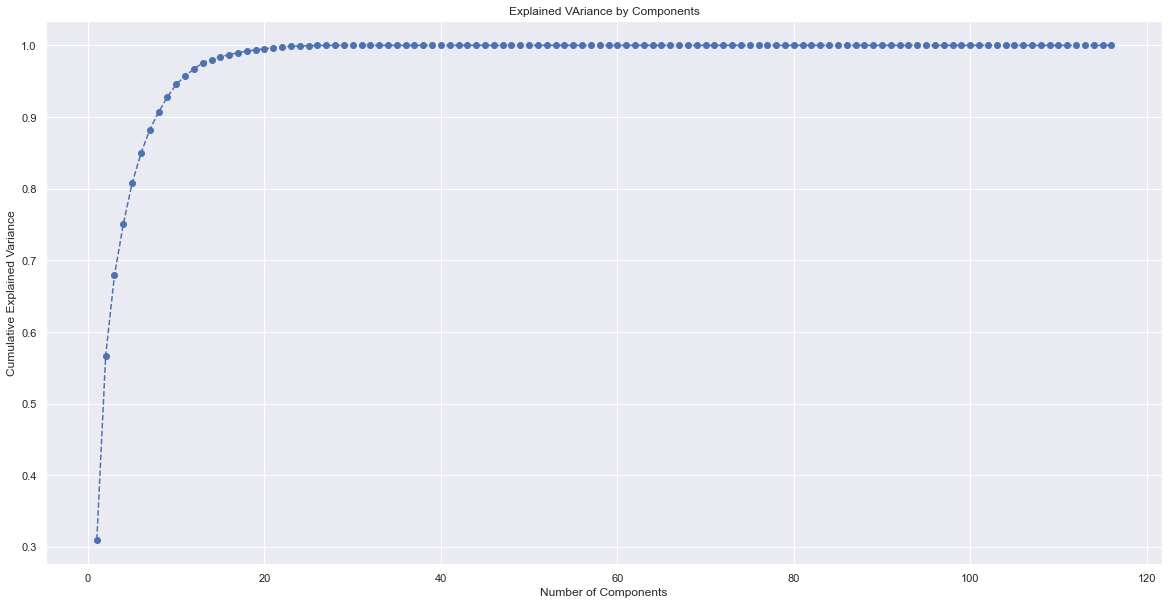

In [8]:
#cumulative variance plot
plt.figure(figsize=(20,10))
plt.plot(range(1,117), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained VAriance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [9]:
# We choose 15 components. It seems the right choice according to the previous graph.
pca= PCA(n_components=15)

In [ ]:
# Fit the model to our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

In [11]:
pca.transform(segmentation_std)

array([[-2.67118625e+00, -2.78891693e-01,  4.12249496e-01, ...,
        -8.48755410e-01, -2.08066067e-01, -1.91639211e-01],
       [-2.16345157e+00, -2.98651759e-01,  1.32402976e-03, ...,
        -8.34850109e-01,  5.42191227e-01, -2.89760034e-01],
       [-1.89322742e+00, -3.34900991e-01, -2.17656918e-01, ...,
        -8.62365391e-01,  7.36622625e-01, -1.90210658e-01],
       ...,
       [-1.83763154e+00,  2.67633829e-01, -9.58518126e-02, ...,
        -2.88445625e-01,  4.61794688e-01,  1.30124459e-01],
       [-1.74711515e+00,  4.49890299e-01, -2.68761732e-01, ...,
        -1.95393865e-01,  3.87683891e-01,  4.02251637e-02],
       [-1.49089029e+00,  3.86207373e+00,  1.83937008e+00, ...,
         1.71517715e-01,  6.30081056e-01, -4.45922386e-01]])

In [12]:
scores_pca=pca.transform(segmentation_std)

In [13]:
# We fit K Means using the transformed data with pca
wcss=[]
for i in range (1,35):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

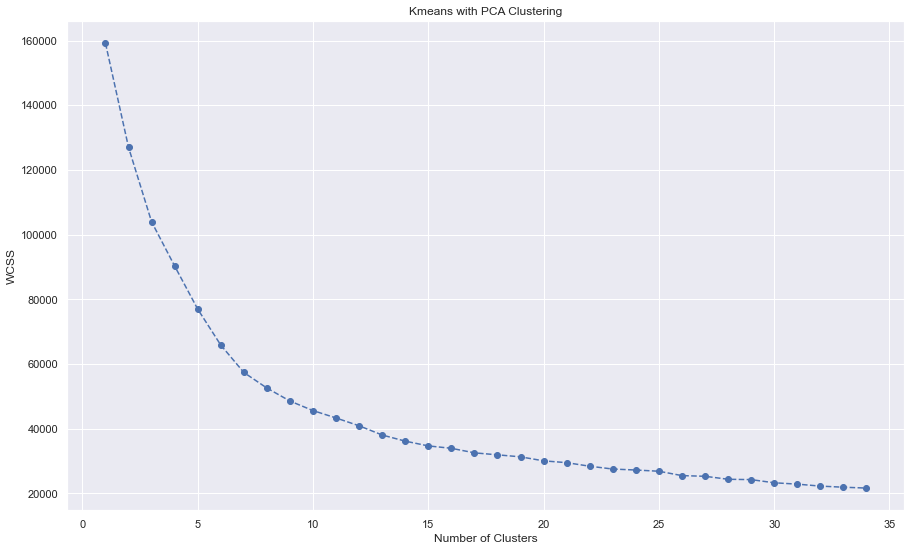

In [14]:
#This step involves plotting the WCSS against the number of components on a graph.
plt.figure(figsize=(15,9))
plt.plot(range(1,35), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA Clustering')
plt.show()

In [15]:
# We have choosen 7 clusters
kmeans_pca=KMeans(n_clusters=7, init='k-means++', random_state=42)

In [16]:
#We fit our data with the kmeans pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=7, random_state=42)

In [17]:
#We create a new dataframe with the original features and add the pca scores and assigned clusters
df_segm_pca_kmeans=pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-7:]=['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7',]


In [18]:
#The last column we add contains the pca kmeans clusters
df_segm_pca_kmeans['Segment K-means PCA']=kmeans_pca.labels_

In [20]:
#We create a new column named ‘Segment’ and map the seven clusters directly inside it
df_segm_pca_kmeans['Segment']=df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth',6:'seventh',7:'eighth'})

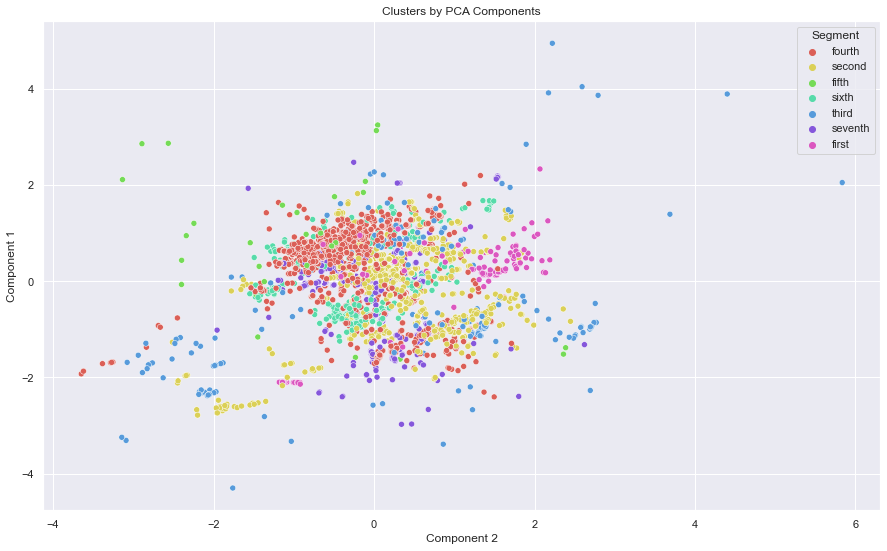

In [28]:
#Plot Data by PCA components. The Y axis is the first component, the X is the second component
x_axis=df_segm_pca_kmeans['Component 2']
y_axis=df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(15,9))
#sns.scatterplot(x_axis,y_axis, hue='Segment', palette=['d' , 'm', 'g', 'r', 'p' , 'b' , 'c'])
#sns.scatterplot(data=df_segm_pca_kmeans,x_axis,y_axis,hue='Segment', palette="deep")
sns.scatterplot(x=x_axis,y=y_axis,hue='Segment',palette=sns.color_palette("hls",7),data=df_segm_pca_kmeans,
               legend="full")
plt.title('Clusters by PCA Components')
plt.show()

In [35]:

#We used mutual information model Mutual information, it is calculated between two variables and measures 
# the reduction in uncertainty for one variable given a known value of the other variable
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df_segmentation, df_segm_pca_kmeans['Segment'])
mutual_info

array([7.30602498e-01, 6.94788596e-01, 6.87797812e-01, 7.91179321e-01,
       8.20439496e-01, 9.68440023e-01, 9.51195897e-01, 2.58520241e-01,
       0.00000000e+00, 1.24193600e-02, 0.00000000e+00, 0.00000000e+00,
       8.01460762e-03, 3.43869400e-03, 0.00000000e+00, 4.38631827e-04,
       7.41507960e-01, 7.47828431e-01, 5.20957514e-03, 2.31371121e-02,
       0.00000000e+00, 0.00000000e+00, 1.40602477e-01, 2.06382981e-02,
       0.00000000e+00, 2.95101752e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.46259975e-03, 1.34474217e-02, 1.86717667e-02,
       0.00000000e+00, 7.31748146e-03, 0.00000000e+00, 0.00000000e+00,
       3.18939497e-03, 7.44873698e-01, 0.00000000e+00, 0.00000000e+00,
       1.09950106e-02, 0.00000000e+00, 3.30708281e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.27060356e-03, 2.51555148e-03,
       0.00000000e+00, 4.27706185e-03, 0.00000000e+00, 0.00000000e+00,
       1.27632551e-02, 0.00000000e+00, 1.15179418e-02, 0.00000000e+00,
      

In [36]:
#Apply the feature importance
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_segmentation.columns
mutual_info.sort_values(ascending=False)

delay_rise              0.968440
delay_fall              0.951196
leakage_power           0.895225
output_slew_fall_y      0.864708
output_slew_rise_y      0.852355
                          ...   
is_memory_y             0.000000
is_multibit_latch       0.000000
is_power_switch_cell    0.000000
is_retention_cell       0.000000
is_buffer_y             0.000000
Length: 116, dtype: float64

<AxesSubplot:>

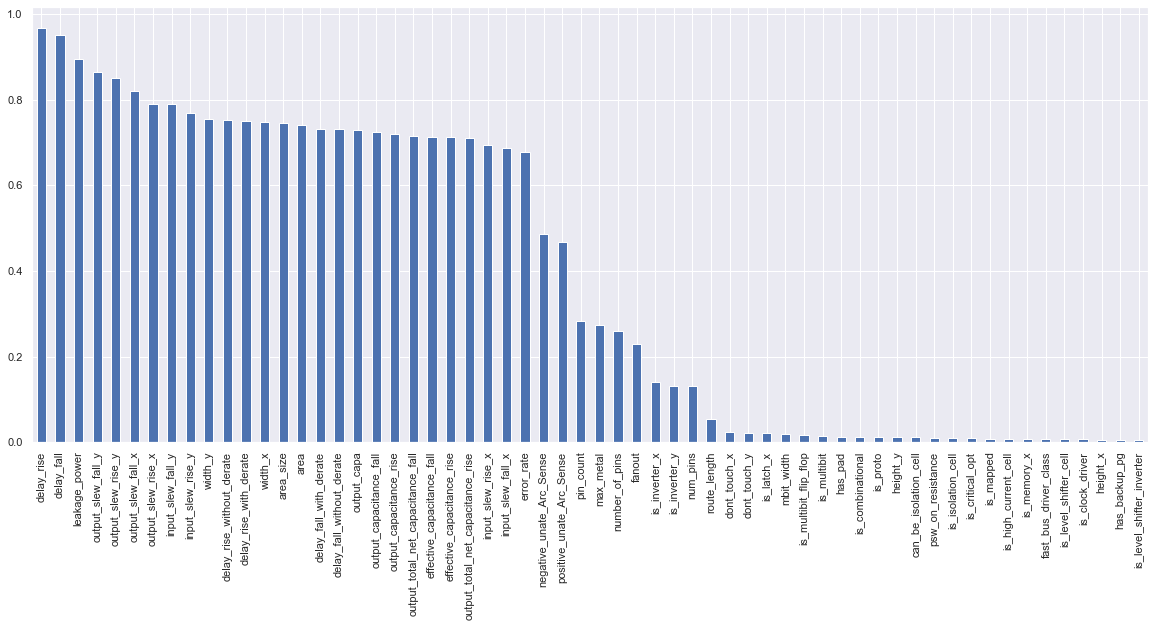

In [41]:
#plot mutual information results
mutual_info.sort_values(ascending=False).iloc[0:60].plot.bar(figsize=(20, 8))